In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import dateparser
import datetime
from datetime import datetime
import torch
import yfinance as yf

In [3]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [4]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, top_k=None)
test = ["China's GDP hits highest in decades, beating the USA by 5 percentage points.", "declining growth and high discount rates plague the nation"]
classifier(test)

[[{'label': 'positive', 'score': 0.925235390663147},
  {'label': 'neutral', 'score': 0.043563127517700195},
  {'label': 'negative', 'score': 0.03120151162147522}],
 [{'label': 'negative', 'score': 0.9688035249710083},
  {'label': 'neutral', 'score': 0.02160501480102539},
  {'label': 'positive', 'score': 0.00959145650267601}]]

In [5]:
wsj2021_df = pd.read_csv('wsjData/wsjData_2021.csv')
print(wsj2021_df.columns)
wsj2021_df.head()

Index(['Unnamed: 0', 'headlines', 'dates', 'summaries'], dtype='object')


,Unnamed: 0,headlines,dates,summaries
0,0,BlackRock Scales Back Private-Equity Fund Ambi...,"Jan. 1, 2021 5:30 am ET",BlackRock Inc. planned to shake up the priva...
1,1,The Benefits of Sticking to New Year’s Resolut...,"Jan. 1, 2021 5:30 am ET",Mark this date on your calendar: March 7. That...
2,2,Five Investment Trends That Skyrocketed in 2020,"Jan. 1, 2021 5:30 am ET",U.S. stocks have arrived at their record-setti...
3,3,These Tiny Last-Minute Tax Changes Could Be a ...,"Jan. 1, 2021 5:30 am ET","With taxes, small changes often add up to big ..."
4,4,The Hot Battery Startup That Could Zap Tesla,"Jan. 1, 2021 5:30 am ET",One of the wildest plotlines in the great 2020...


In [6]:
for i in wsj2021_df["dates"][0:20]:
    if i is None:
        continue
    elif "Updated" in i:
        datetime = datetime.strptime(i, 'Updated %b. %d, %Y %I:%M %p ET')
    else:
        datetime = datetime.strptime(i, '%b. %d, %Y %I:%M %p ET')
    print(datetime)

2021-01-01 05:30:00
2021-01-01 05:30:00
2021-01-01 05:30:00
2021-01-01 05:30:00
2021-01-01 05:30:00
2021-01-01 07:00:00
2021-01-01 07:00:00
2021-01-01 07:00:00
2021-01-01 07:00:00
2021-01-01 08:00:00
2021-01-01 08:36:00
2021-01-01 09:00:00
2021-01-01 09:00:00
2021-01-01 09:00:00
2021-01-01 10:35:00
2021-01-01 11:00:00
2021-01-01 11:08:00
2021-01-01 11:16:00
2021-01-01 11:28:00
2021-01-01 11:29:00


In [7]:
# general market
# banking / finance / business
# technology, software, electronics
# pharmaceutical, disease, medicine, doctors
# weapons, war, defense
# real estate, housing, home, building, construction
# energy, water, oil, gas, electricity
start, end = 0, 10
X_headlines = wsj2021_df["headlines"][start:end].tolist()
x_summaries = wsj2021_df["summaries"][start:end].tolist()
y = classifier(X_headlines)

[*********************100%***********************]  1 of 1 completed


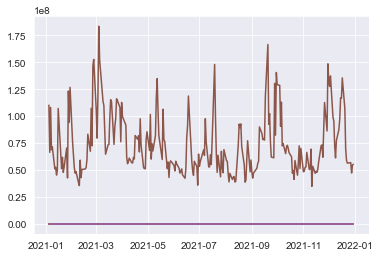

<class 'pandas.core.frame.DataFrame'> Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         3.753100e+02
High         3.754500e+02
Low          3.648200e+02
Close        3.687900e+02
Adj Close    3.597733e+02
Volume       1.102108e+08
Name: 2021-01-04 00:00:00, dtype: float64 2021-01-04 00:00:00


In [22]:
import matplotlib.pyplot as plt

spy = yf.download("SPY", start = "2021-01-01", end = "2021-12-31", interval='1d')
plt.plot(spy)
plt.show()
print(type(spy), spy.columns, spy.columns)
print(spy.iloc[0], spy.iloc[0].name)